

## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [3]:
data.isnull().any().any()



False

In [4]:
data.columns


Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [8]:
binar = ['credit_risk','foreign_worker','telephone',]
ordinal = ['employment_duration','installment_rate','number_credits']
quantitative = ['duration','amount','people_liable','present_residence','age']
#else are categorical


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [9]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [10]:
len(data[(data['age'] < 30) & (data['housing'] == 'rent')])/len(data)*100


24.6

In [11]:
len(data[(data['age'] > 40) & (data['housing'] == 'rent')])/len(data)*100

18.5

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [12]:
len(data[(data['foreign_worker'] == 'yes') & (data['number_credits'] >'2-3')])

1

### Задание 6 (1 балл)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


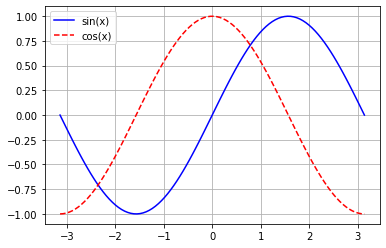

In [3]:
x = np.linspace(-np.pi,np.pi, num =100)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), color = 'b', label ='sin(x)')
ax.plot(x,np.cos(x), color = 'r', linestyle= '--',label ='cos(x)')
ax.legend()
ax.grid()


Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

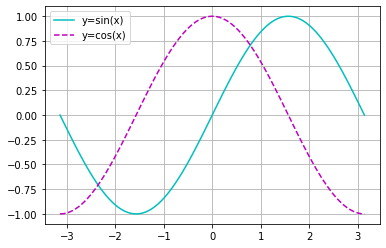

In [8]:
# выше

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

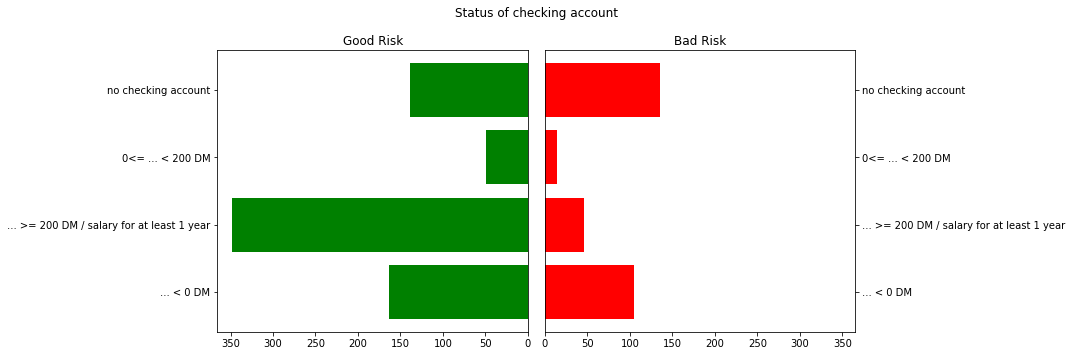

Text(0.5, 1.0, 'Bad risk')

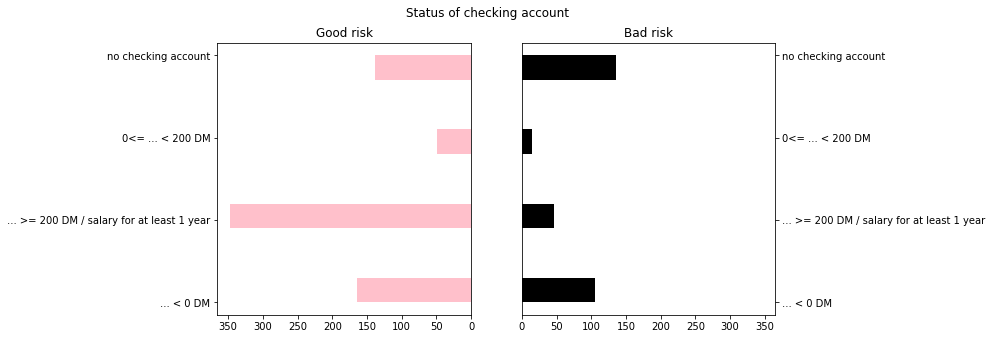

In [185]:
data_good = data[data['credit_risk']== 'good']['status'].sort_values()
data_bad = data[data['credit_risk']== 'bad']['status'].sort_values()
fig = plt.figure(1,(10,5))
fig.suptitle('Status of checking account')
ax_1 = fig.add_subplot(1,2,1)
ax_2 = fig.add_subplot(1,2,2)
ax_1.hist(data_good, orientation=u'horizontal',color ='pink')
xlim = ax_1.get_xlim()
ax_1.set_xlim(ax_1.get_xlim()[::-1])
ax_1.yaxis.tick_left()
ax_2.hist(data_bad, orientation=u'horizontal',color ='black')
ax_2.yaxis.tick_right()
ax_2.set_xlim(xlim)
ax_1.set_title("Good risk")
ax_2.set_title('Bad risk')


### Задание 8  (0.5 балла)

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

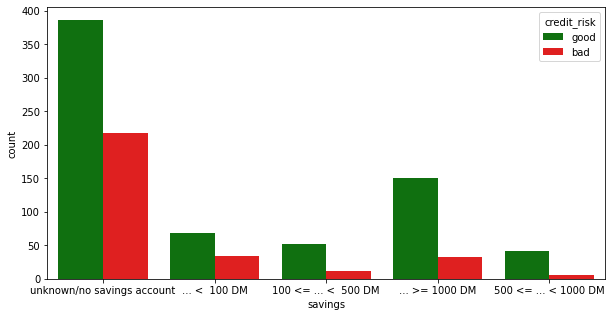

In [11]:
# your code here

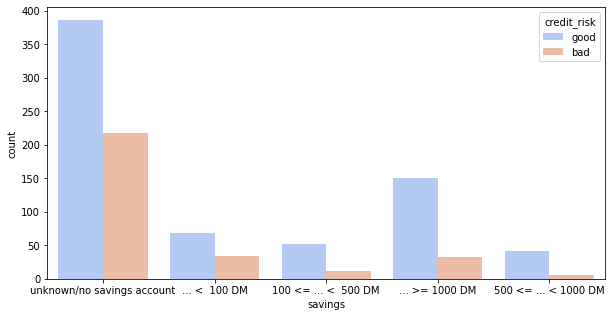

In [203]:
plt.figure(2,(10, 5))
sns.countplot(x='savings', hue='credit_risk', data=data, palette="coolwarm")
plt.show()

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

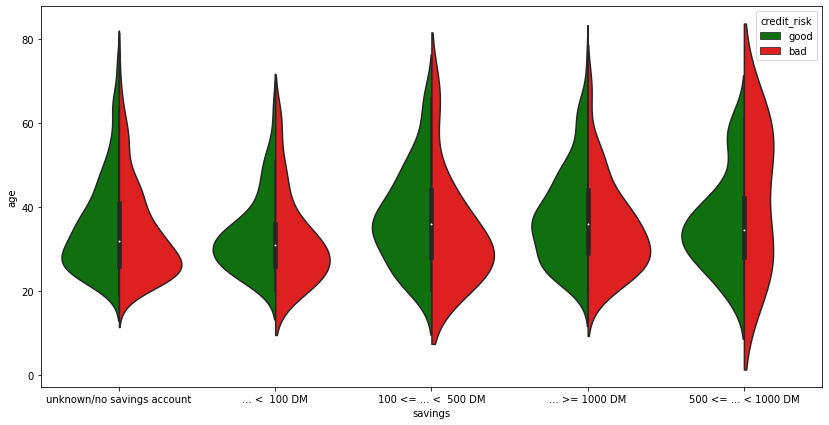

In [12]:
# your code here

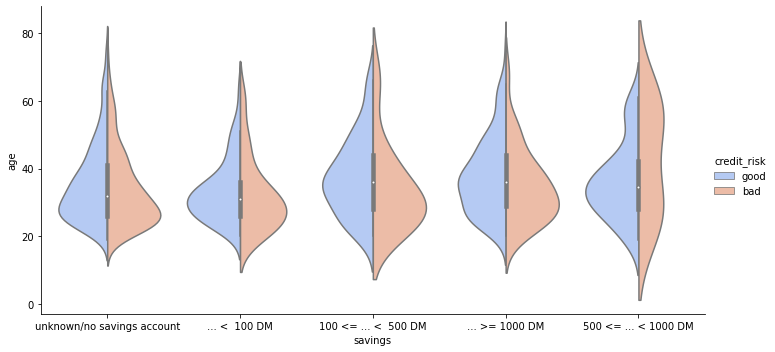

In [239]:
sns.catplot(x = 'savings', y = 'age', hue ='credit_risk', split = True, data=data, kind = 'violin', palette='coolwarm', height=5, aspect= 2)


### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

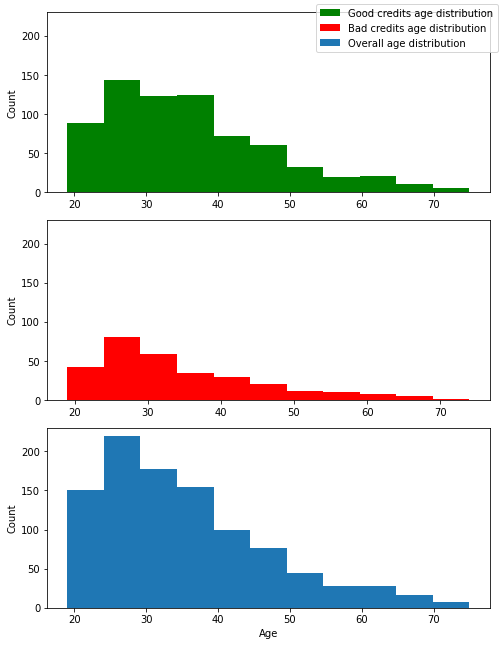

In [13]:
# your code here

/Users/kirill/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

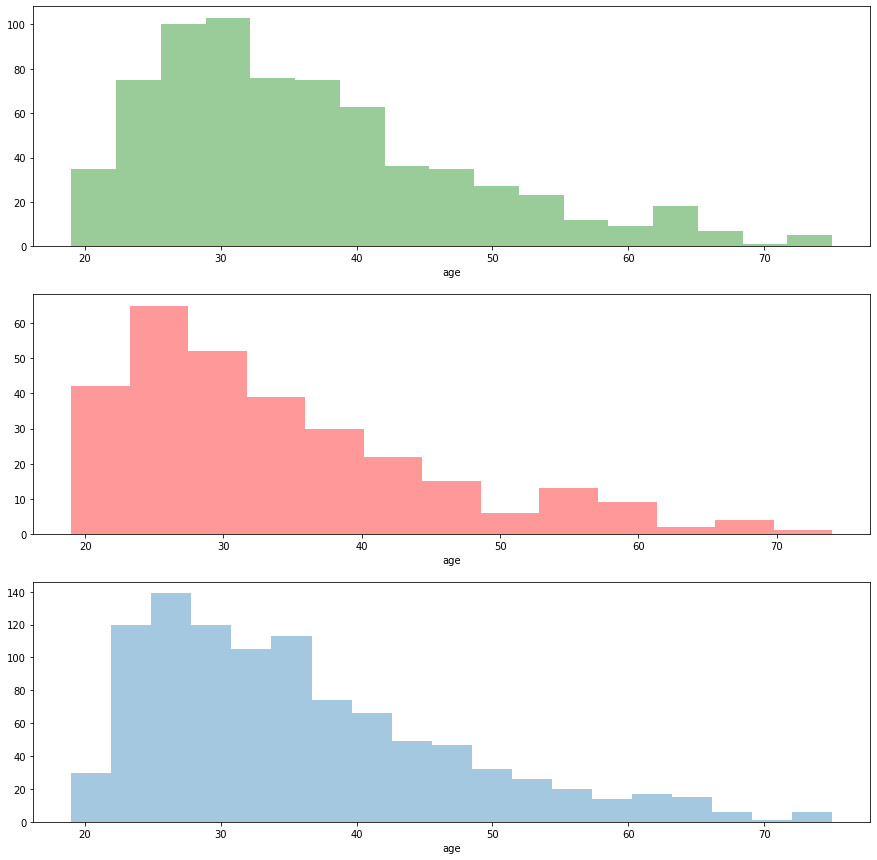

In [14]:
fig=plt.figure(figsize=(15,15)) 
plt.subplot(3, 1,1) 
sns.distplot(data[data['credit_risk'] == 'good']['age'], color = 'g', kde = False) 
plt.subplot(3, 1,2) 
sns.distplot(data[data['credit_risk'] == 'bad']['age'], color = 'r', kde = False) 
plt.subplot(3, 1,3) 
sns.distplot(data['age'], kde = False)


### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

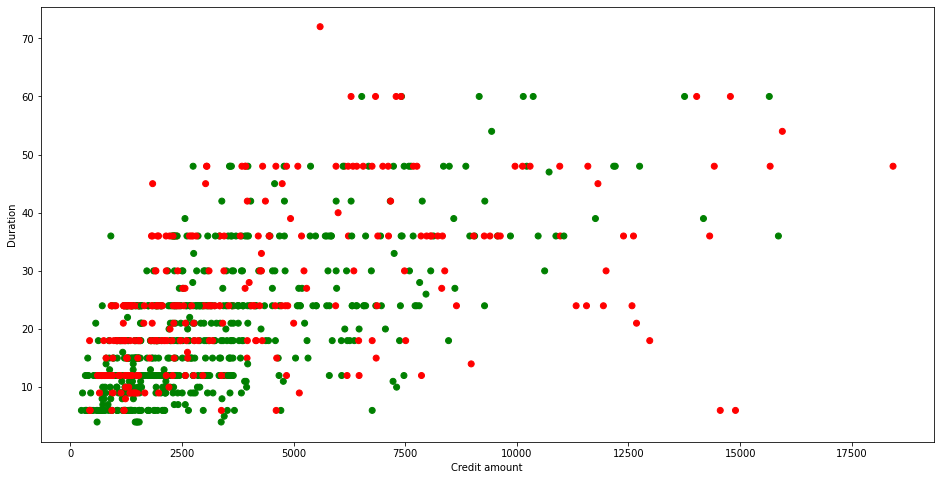

In [21]:
# your code here

<AxesSubplot:xlabel='amount', ylabel='duration'>

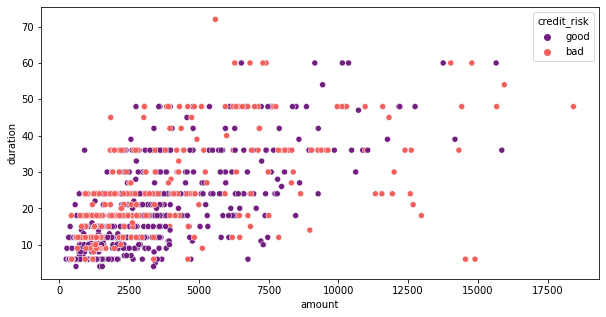

In [15]:
plt.figure(2,(10, 5))
sns.scatterplot(data = data, x = 'amount', y = 'duration', hue ='credit_risk', palette='magma')

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

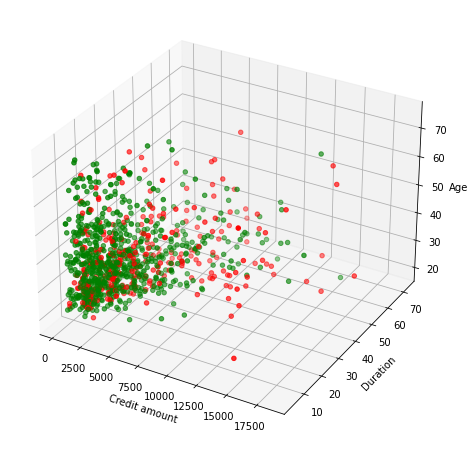

In [15]:
# your code here

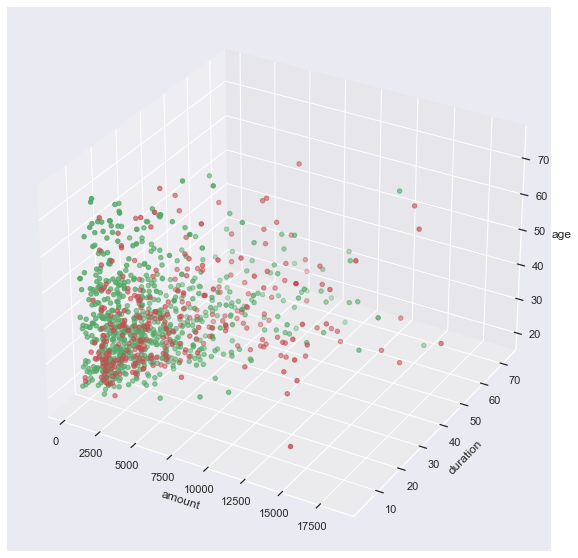

In [16]:
sns.set(style = "darkgrid") 
fig = plt.figure(figsize= (10,10)) 
ax = fig.add_subplot(111, projection = '3d')
x = data[data['credit_risk'] == 'good']['amount']
y = data[data['credit_risk'] == 'good']['duration']
x1 = data[data['credit_risk'] == 'bad']['amount']
y1 = data[data['credit_risk'] == 'bad']['duration']
z = data['age'][data['credit_risk'] == 'good']
z1 = data[data['credit_risk'] == 'bad']['age']
ax.set_xlabel("amount") 
ax.set_ylabel("duration") 
ax.set_zlabel("age") 
ax.scatter(x,y,z, c = 'g')
ax.scatter(x1,y1,z1, c = 'r')

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [21]:
df = data[binar + ordinal+quantitative]
df = df.astype('category')
for var in (binar + ordinal):
    df[var] = df[var].cat.codes
df


,credit_risk,foreign_worker,telephone,employment_duration,installment_rate,number_credits,duration,amount,people_liable,present_residence,age
0,1,0,0,2,2,0,18,1049,0 to 2,>= 7 yrs,21
1,1,0,0,0,1,1,9,2799,3 or more,1 <= ... < 4 yrs,36
2,1,0,0,1,1,0,12,841,0 to 2,>= 7 yrs,23
3,1,1,0,0,0,1,12,2122,3 or more,1 <= ... < 4 yrs,39
4,1,1,0,0,2,1,12,2171,0 to 2,>= 7 yrs,38
...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,1,0,24,1987,3 or more,>= 7 yrs,21
996,0,0,0,3,2,0,24,2303,0 to 2,< 1 yr,45
997,0,0,1,3,2,0,21,12680,0 to 2,>= 7 yrs,30
998,0,0,1,4,1,0,12,6468,0 to 2,< 1 yr,52


In [22]:
# избавляюсь от ненужных кол-ных признаков, которые в целом можно было засунуть в порядковые, но не
df.pop('people_liable')
df.pop('present_residence')
df

,credit_risk,foreign_worker,telephone,employment_duration,installment_rate,number_credits,duration,amount,age
0,1,0,0,2,2,0,18,1049,21
1,1,0,0,0,1,1,9,2799,36
2,1,0,0,1,1,0,12,841,23
3,1,1,0,0,0,1,12,2122,39
4,1,1,0,0,2,1,12,2171,38
...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,1,0,24,1987,21
996,0,0,0,3,2,0,24,2303,45
997,0,0,1,3,2,0,21,12680,30
998,0,0,1,4,1,0,12,6468,52


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [25]:
def predict(Xtest: np.array) -> np.array:
  m = Xtest[:,6]/np.mean(Xtest[:,6])
  koef1 = (m/np.max(m))**2
  koef2 = (Xtest[:,7]/Xtest[:,7].max())**2
  a = np.zeros(len(Xtest))
  a = np.where( np.sqrt((koef1+koef2)/2)> 0.2,1,0)
  return a
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df.drop('credit_risk', 1).values
y = df['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))

/var/folders/7b/_0j65qyd6_l801khvk_jh2yh0000gn/T/ipykernel_17700/1981250632.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('credit_risk', 1).values


0.66

In [1]:
import numpy as np


In [23]:
x = np.array([10, 20]).reshape(-1,1)


In [18]:
trag = np.hstack((x,y))
trag

array([[1, 4],
       [2, 3],
       [3, 2],
       [4, 1]])